# Exploratory Data Analysis of Tips Dataset

### Author: Kari Taylor
### Date: June 2, 2024

### This module 6 project focuses on demonstrating skills with Jupyter, pandas, Seaborn and other popular tools for data analytics. The notebook created for this project will present data in an engaging manner through the use of statistcal analysis tables and visually appealing graphs/charts.

## Import Dependencies and Data Aquisition 

In [212]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Load the dataset into a pandas DataFrame - adjust this process for your custom data
df = sns.load_dataset('tips')

# Inspect first rows of the DataFrame
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## Initial Data Inspection

In [213]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
(244, 7)
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


## Initial Descriptive Statistics

In [214]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


## Initial Data Distribution for Tip Column 

<Axes: >

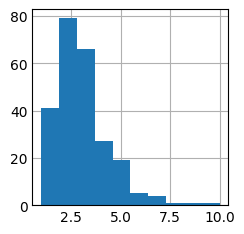

In [215]:
# Inspect histogram by numerical column
df['tip'].hist()

## Initial Data Distribution for All Numerical Columns

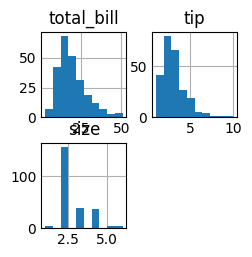

In [216]:
# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

## Initial Data Distribution for Categorical Columns 

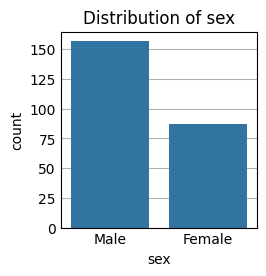

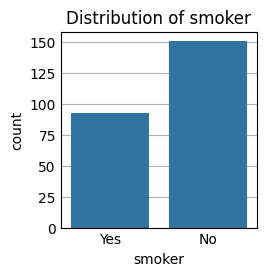

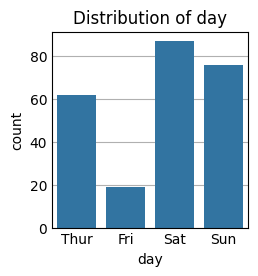

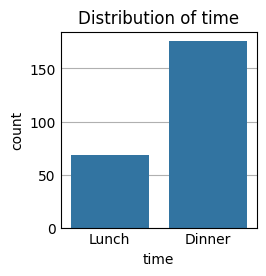

In [217]:
# Inspect value counts by categorical column
df['tip'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

## Initial Data Transformation and Feature Engineering

In [218]:
#Rename columns
df.rename(columns={'smoker': 'smoker_status'}, inplace=True)
df.rename(columns={'size': 'party_size'}, inplace=True)

#Add columns
df['tip_percentage'] = ((df['tip'] / df['total_bill']) * 100).round(2)

#Check data transformations
print(df.head(10))

   total_bill   tip     sex smoker_status  day    time  party_size  \
0       16.99  1.01  Female            No  Sun  Dinner           2   
1       10.34  1.66    Male            No  Sun  Dinner           3   
2       21.01  3.50    Male            No  Sun  Dinner           3   
3       23.68  3.31    Male            No  Sun  Dinner           2   
4       24.59  3.61  Female            No  Sun  Dinner           4   
5       25.29  4.71    Male            No  Sun  Dinner           4   
6        8.77  2.00    Male            No  Sun  Dinner           2   
7       26.88  3.12    Male            No  Sun  Dinner           4   
8       15.04  1.96    Male            No  Sun  Dinner           2   
9       14.78  3.23    Male            No  Sun  Dinner           2   

   tip_percentage  
0            5.94  
1           16.05  
2           16.66  
3           13.98  
4           14.68  
5           18.62  
6           22.81  
7           11.61  
8           13.03  
9           21.85  


The column named 'smoker' was renamed to 'smoker_status', and the column named 'size' was renamed to 'party_size'. 

An additional column, named 'tip_percentage' was added. This column figures the percent of the total bill that the customer tipped. Essentially, it tells us how good of a tip the customer left. 

## Initial Visualizations

### **Which day of the week and time of day yields the highest percentage of tips?**

#### This question will be explored using a swarm plot. This will allow us to investigate the distribution of tip percentage across both time of day and day of the week.  

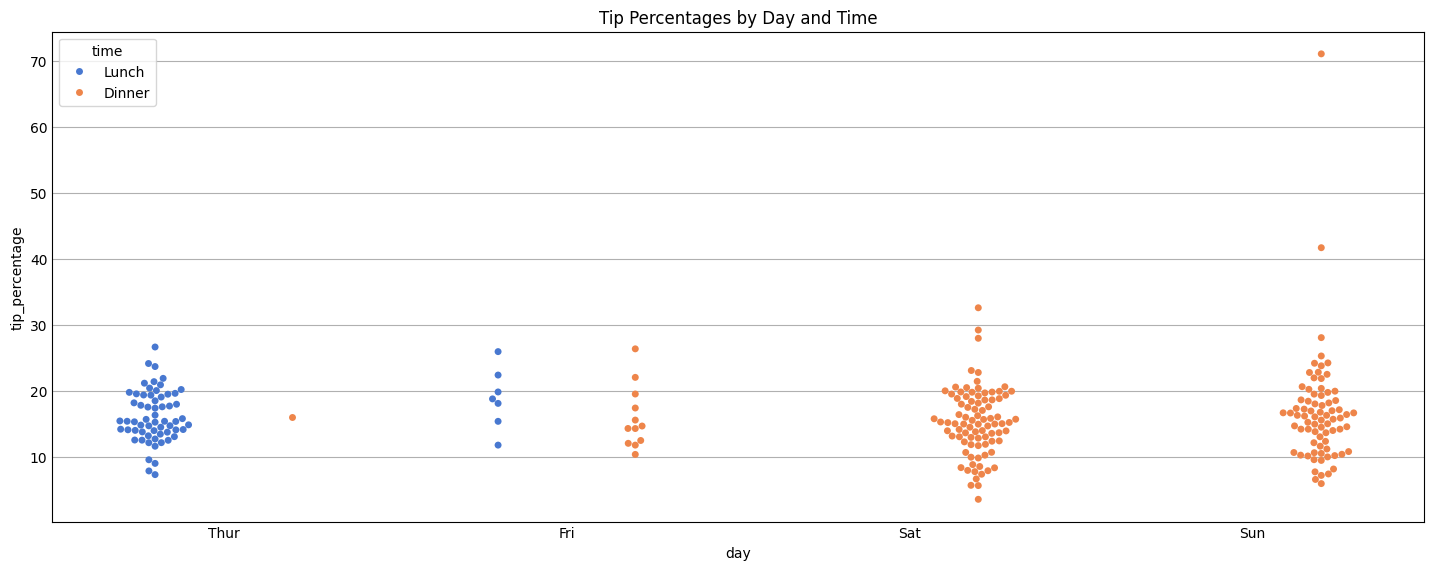

In [219]:
#Swarm plot 
plt.figure(figsize=(14, 5))
sns.swarmplot(data=df,
              x="day",
              y="tip_percentage",
              hue="time",
              dodge=True,    # separate strips of points of different colors
              order = [ "Thur", "Fri", "Sat", "Sun"],
              palette = "muted"
             )

plt.title("Tip Percentages by Day and Time")
plt.show()

#### **Observations**: The swarm plot clearly indicates that the thursday lunch rush yields a much higher percentage of tips compared to the Friday lunch hour. However, the data is still a bit unclear about which weekend day yields a higher tip percentage for the dinner rush. Let's explore that further. 

In [220]:
#Pull data for saturday dinner tips
sat_dinner_tips = df[(df['day'] == 'Sat') & (df['time'] == 'Dinner')]

#Check the filtered data
sat_dinner_tips.head()

,total_bill,tip,sex,smoker_status,day,time,party_size,tip_percentage
19,20.65,3.35,Male,No,Sat,Dinner,3,16.22
20,17.92,4.08,Male,No,Sat,Dinner,2,22.77
21,20.29,2.75,Female,No,Sat,Dinner,2,13.55
22,15.77,2.23,Female,No,Sat,Dinner,2,14.14
23,39.42,7.58,Male,No,Sat,Dinner,4,19.23


I used the above code to filter through the dataset to give me only the information that I'm looking for --- just the tips from Saturday at dinnertime. 

In [221]:
#Pull data for sunday dinner tips
sun_dinner_tips = df[(df['day'] == 'Sun') & (df['time'] == 'Dinner')]

#Check the filtered data
sun_dinner_tips.head()

,total_bill,tip,sex,smoker_status,day,time,party_size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


I used the above code to filter through the dataset to give me the next piece of information that I'm looking for --- just the tips from Sunday at dinnertime. 

In [222]:
#Find median tip percentage for Saturday's dinner rush
sat_dinner_median = sat_dinner_tips['tip_percentage'].median()

#Print median value of saturday tip percentage
print("Saturday Median:", sat_dinner_median)

Saturday Median: 15.18


The code above figures the median tip percentage for just Saturday dinner. Utilizing the median versus the mean was a more appropriate choice due to a handful of extreme outliers in the data. Using the mean instead of median would likely skew the conclusions drawn from this data; therefore, the median was calculated.

In [223]:
#Find median tip percentage for Sunday's dinner rush
sun_dinner_median = sun_dinner_tips['tip_percentage'].median()

#Print median value of Sunday tip percentage
print("Sunday Median:", sun_dinner_median)

Sunday Median: 16.11


The code above figures the median tip percentage from only Sunday dinner.

In [224]:
#Calculate the total tips earned during Satuday dinner
sat_dinner_tip_total = sat_dinner_tips['tip'].sum()

#Print total tips earned for Satuday dinner
print("Satuday Dinner Tips:", round(sat_dinner_tip_total, 2), "dollars")

Satuday Dinner Tips: 260.4 dollars


This code totaled the amount of tips earned during Satuday dinner.

In [225]:
#Calculate the total tips earned during Sunday dinner
sun_dinner_tip_total = sun_dinner_tips['tip'].sum()

#Print total tips earned for Satuday dinner
print("Sunday Dinner Tips:", round(sun_dinner_tip_total, 2), "dollars")

Sunday Dinner Tips: 247.39 dollars


This code totaled the amount of tips earned during Sunday dinner.

#### Now that we have extracted all of the relevant data, let's take a look at two different bar charts: one that illustrates the total tips for the dinner rush on both Saturday and Sunday, and another that displays the median tip percentages for both days. 

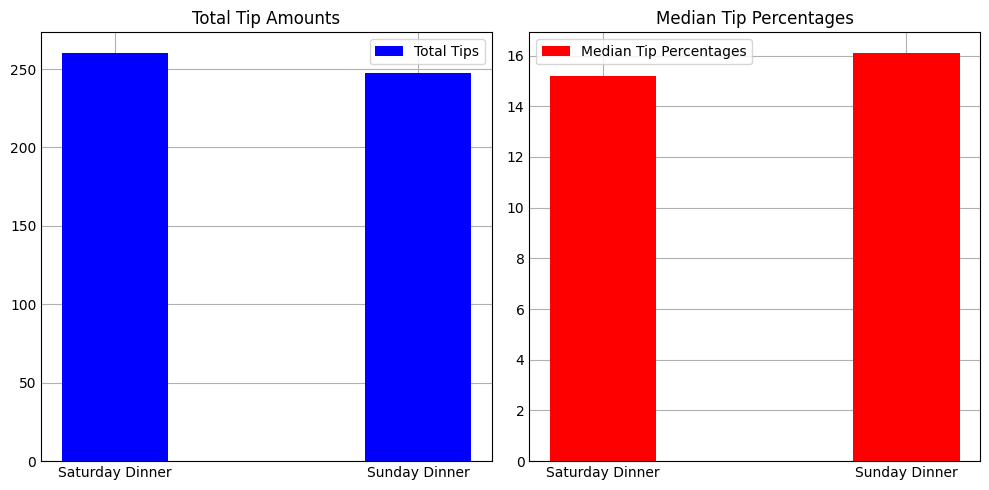

In [226]:
import numpy as np

# Sample data
categories = ['Saturday Dinner', 'Sunday Dinner']
values1 = [sat_dinner_tip_total, sun_dinner_tip_total]
values2 = [sat_dinner_median, sun_dinner_median]

# Set the width of the bars
bar_width = 0.35

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the first bar graph on the first subplot
axes[0].bar(np.arange(len(categories)), values1, bar_width, label='Total Tips', color='blue')
axes[0].set_xticks(np.arange(len(categories)))
axes[0].set_xticklabels(categories)
axes[0].set_title('Total Tip Amounts')
axes[0].legend()

# Plot the second bar graph on the second subplot
axes[1].bar(np.arange(len(categories)) + bar_width, values2, bar_width, label='Median Tip Percentages', color='red')
axes[1].set_xticks(np.arange(len(categories)) + bar_width)
axes[1].set_xticklabels(categories)
axes[1].set_title('Median Tip Percentages')
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

#### **Conclusions**: Now that we've studied some data, let's return to our original question: which day of the week and time of day yields the highest percentage of tips? The data shows us that although Sunday dinner yielded better tippers, the wait staff actually made slightly more money from Saturday's dinner rush. In conclusion, the wait staff stand to earn significantly more tips on the weekend versus during the week --- however, there seems to be not much of a difference between Saturday and Sunday.

### **Who tips better, men or women?**

#### We will explore this question in a similar manner --- starting first, with a swarm plot. 

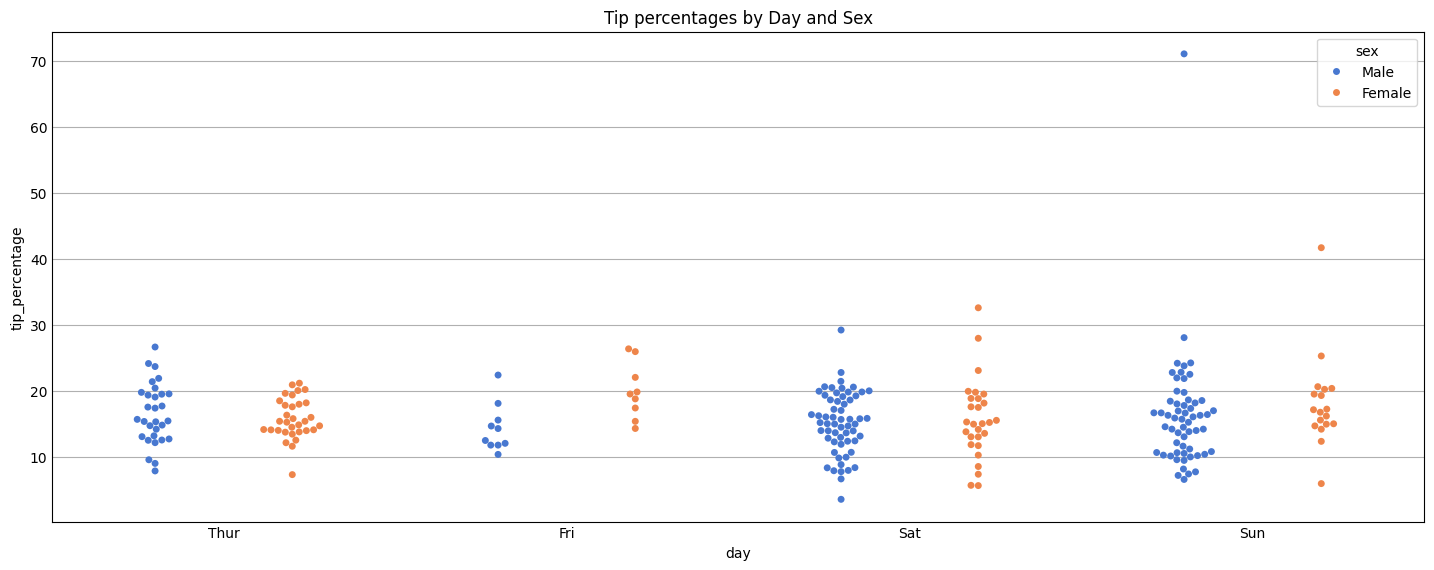

In [227]:
#Swarm plot 
plt.figure(figsize=(14, 5))
sns.swarmplot(data=df,
              x="day",
              y="tip_percentage",
              hue="sex",
              dodge=True,    # separate strips of points of different colors
              order = [ "Thur", "Fri", "Sat", "Sun"],
              palette = "muted"
             )

plt.title("Tip percentages by Day and Sex")
plt.show()

#### **Observations**: Based on the visual above, the data appears to indicate that sex does not have a significant impact on tip percentage. However, it does look like there are significantly more male customers than female. Let's dig a little deeper into the data to find out.

In [234]:
#Pull data for all tips filtered by sex
females = df[(df['sex'] == 'Female')]

#Find mean tip percentage left by women
average_women = females['tip_percentage'].mean()

#Print mean tip percentage left by women
print("Average tip percentage from women:", round(average_women, 2))

#Find total women
total_women = females['tip_percentage'].count()

#Print total number of female customers
print("Total female customers:", total_women)

Average tip percentage from women: 16.65
Total female customers: 87


The above code calculated the average tip percentage left by women and the total number of female customers.

In [237]:
#Pull data for all tips filtered by sex
males = df[(df['sex'] == 'Male')]

#Find mean tip percentage left by men
average_men = males['tip_percentage'].mean()

#Print mean tip percentage left by men
print("Average tip percentage from men:", round(average_men, 2))

#Find total men
total_men = males['tip_percentage'].count()

#Print total number of male customers
print("Total male customers:", total_men)

Average tip percentage from men: 15.76
Total male customers: 157


The code above calculated the average tip percentage left by men and the total number of male customers.

#### **Observations**: Upon further inspection, the data indicated that the average tip percentage among 87 female customers was 16.65% --- compared to 15.76% among 157 male customers. This data makes it appear that women, on average, tip slightly better than men. However, it is possible that the data is skewed by how many more male customers there are than female customers. Let's look at that ratio, and what that means for our central question --- who tips better (men or women)?

In [257]:
#Calculate the total tips by women
female_tip_total = females['tip'].sum()

#Print total tips left by women
print("Sum of tips from women:", round(female_tip_total, 2), "dollars")

#Calculate the total tips by men
male_tip_total = males['tip'].sum()

#Print total tips left by men
print("Sum of tips from men:", round(male_tip_total, 2), "dollars")

Sum of tips from women: 246.51 dollars
Sum of tips from men: 485.07 dollars


This code calculated the sum of the tips that both women and men left.

In [260]:
#Calculate total customers
total_customers = len(df)

#print total customers
print("Total customers:", total_customers)

#Calculate the percentage of women customers
female_customers_percentage = (total_women/total_customers) * 100

#print percentage of female customers
print("Percentage of female customers:", round(female_customers_percentage, 2))

#Calculate total tips
total_tips = male_tip_total + female_tip_total

#print total tips
print("Total tips:", round(total_tips, 2), "dollars")

#Calculate the percentage of tips from women to total tips
female_tips_percentage = (female_tip_total/total_tips) * 100

#print percentage of female tips
print("Percentage of female tips to total tips:", round(female_tips_percentage, 2))

Total customers: 244
Percentage of female customers: 35.66
Total tips: 731.58 dollars
Percentage of female tips to total tips: 33.7


The code above illustrates the total number of customers and what percentage of those customers are women. Additionally, the total amount of tips earned by the wait staff has been totaled, as well as what percentage of those tips were left by women. 

#### **Observations**: The calculations above illustrate that women make up about 36% of the customer base, and left about 34% of the total tips. After extensive data manipulation and invesetigation it appears that, although women tip slightly more according to their tip percentage/total bill ratio, they tipped roughly the same amount per capita as men. Therefore, as much as I would like to conclude that women are better tippers than men --- according to this data --- I can't.